# Распознание цифр из набора MNIST
- Датасет = MNIST
- Фреймворк = PyTorch


### Приступаем к работе

In [23]:
# Через восклицательный знак устанавливаются библиотеки в Jupyter

!pip install numpy
!pip install torch
!pip install torchvision
!pip install matplotlib

You should consider upgrading via the 'E:\my\code\handwritten-digit-recognition\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'E:\my\code\handwritten-digit-recognition\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'E:\my\code\handwritten-digit-recognition\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'E:\my\code\handwritten-digit-recognition\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
# Импортируем библиотеки, нужные для разработки
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

# Строчка ниже говорит о том, чтобы графики отрисовывались прямо в блокноте, не создавая новое окно
%matplotlib inline
# Задаем вид отображение графика
%config InlineBackend.figure_format = 'retina'

### Загружаем данные

In [8]:
### Запускаем эту ячейку и идет загрузка датасета

from torchvision import datasets, transforms

# Трансформируем данные в удобный формат для работы
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Загружаем данные 
trainset = datasets.MNIST('dataset/', download=True, train=True, transform=transform)
valset = datasets.MNIST('dataset/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

9.6%

100.0%


Extracting dataset/MNIST\raw\train-images-idx3-ubyte.gz to dataset/MNIST\raw



100.0%

Extracting dataset/MNIST\raw\train-labels-idx1-ubyte.gz to dataset/MNIST\raw




33.8%

100.0%


Extracting dataset/MNIST\raw\t10k-images-idx3-ubyte.gz to dataset/MNIST\raw



100.0%

Extracting dataset/MNIST\raw\t10k-labels-idx1-ubyte.gz to dataset/MNIST\raw



### Теперь посмотрим, что скачали

In [29]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Теперь изображения хранятся в виде чисел

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


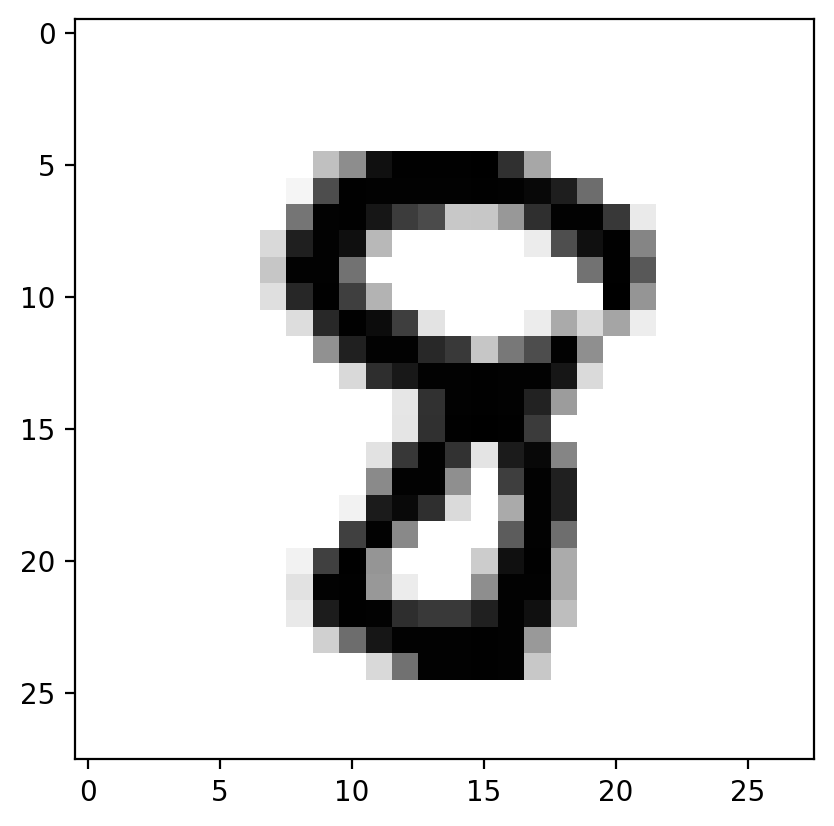

In [30]:
# А так выглядят изображения
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

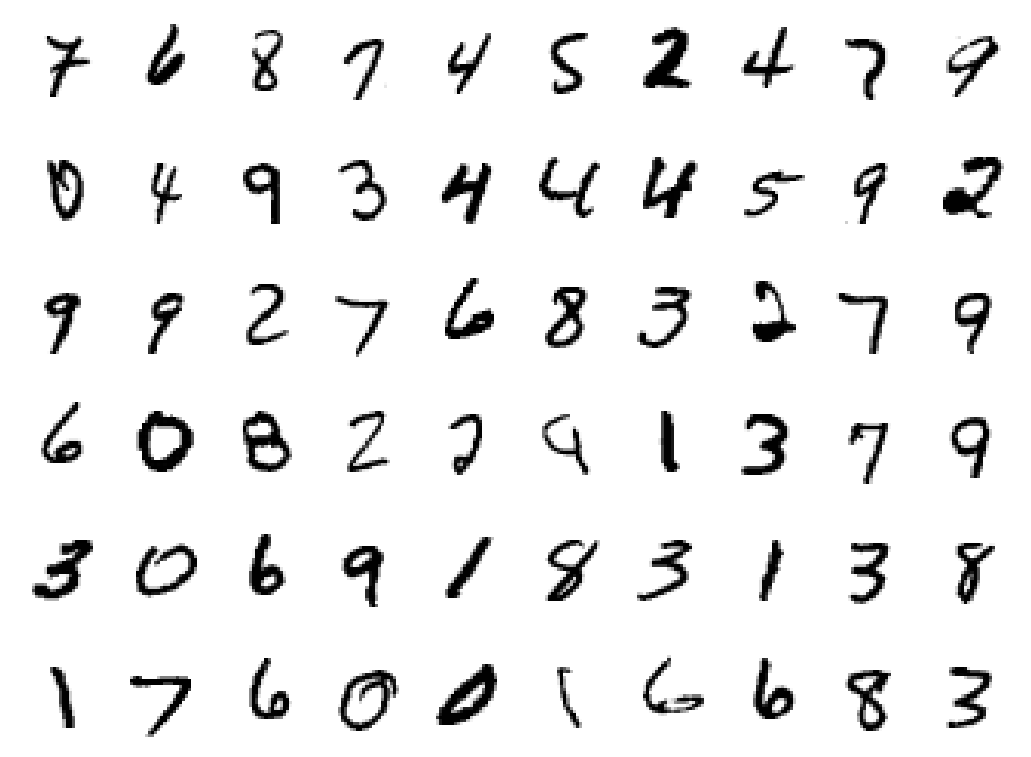

In [31]:
# Вот несколько цифр
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Строим нейросеть

In [44]:
from torch import nn

# Эти параметры вынесем по отдельности для удобства изменения
input_size = 784
hidden_size = 64
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [39]:
from torch import optim

# Создадим оптимизатор для улучшения нейросети
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [45]:
print('Начальные веса - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Посмотрим какие начальные веса, сделаем дополнительное очищение от лишних зависимостей
optimizer.zero_grad()

# Сделаем один шаг в работе нейросетей и посмотрим как меняются веса
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Градиент -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0292,  0.0220, -0.0040,  ...,  0.0136, -0.0127, -0.0164],
        [ 0.0338, -0.0193,  0.0018,  ..., -0.0234,  0.0281,  0.0250],
        [-0.0328, -0.0305,  0.0145,  ...,  0.0284,  0.0216,  0.0038],
        ...,
        [ 0.0166,  0.0204, -0.0084,  ..., -0.0053, -0.0160, -0.0002],
        [-0.0260,  0.0274,  0.0337,  ...,  0.0348, -0.0321,  0.0195],
        [-0.0267,  0.0213,  0.0150,  ...,  0.0190,  0.0098,  0.0001]],
       requires_grad=True)
Gradient - tensor([[-0.0047, -0.0047, -0.0047,  ..., -0.0047, -0.0047, -0.0047],
        [ 0.0163,  0.0163,  0.0163,  ...,  0.0163,  0.0163,  0.0163],
        [ 0.0042,  0.0042,  0.0042,  ...,  0.0042,  0.0042,  0.0042],
        ...,
        [ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026]])


In [41]:
# Результат прошлых действий
optimizer.step()
print('Новые веса - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0197, -0.0267,  0.0138,  ..., -0.0041,  0.0284, -0.0097],
        [ 0.0326, -0.0153,  0.0229,  ..., -0.0275, -0.0022, -0.0169],
        [-0.0067, -0.0192, -0.0093,  ...,  0.0231,  0.0055,  0.0173],
        ...,
        [ 0.0339,  0.0098,  0.0244,  ...,  0.0068,  0.0299, -0.0048],
        [-0.0063, -0.0334,  0.0298,  ...,  0.0052, -0.0105,  0.0088],
        [ 0.0136,  0.0295, -0.0326,  ...,  0.0035,  0.0303, -0.0337]],
       requires_grad=True)


### Обучение нейросети

In [46]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Выправляем наши цифровые картинки в один длинный вектор
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        
        #Метод обратного распространения ошибки
        loss.backward()
        
        # птимизируем веса
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Эпоха {} Ошибка = {}".format(e, running_loss/len(trainloader)))
print("\nВремя обучения в минутах =",(time()-time0)/60)


Эпоха 0 Ошибка = 0.5268759574177169


KeyboardInterrupt: 

In [47]:
def view_classify(img, ps):
    # Функция для отображения цифры и вероятного значения по мнению нейросети
    
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Вероятность точности')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Предсказанная цифра = 8


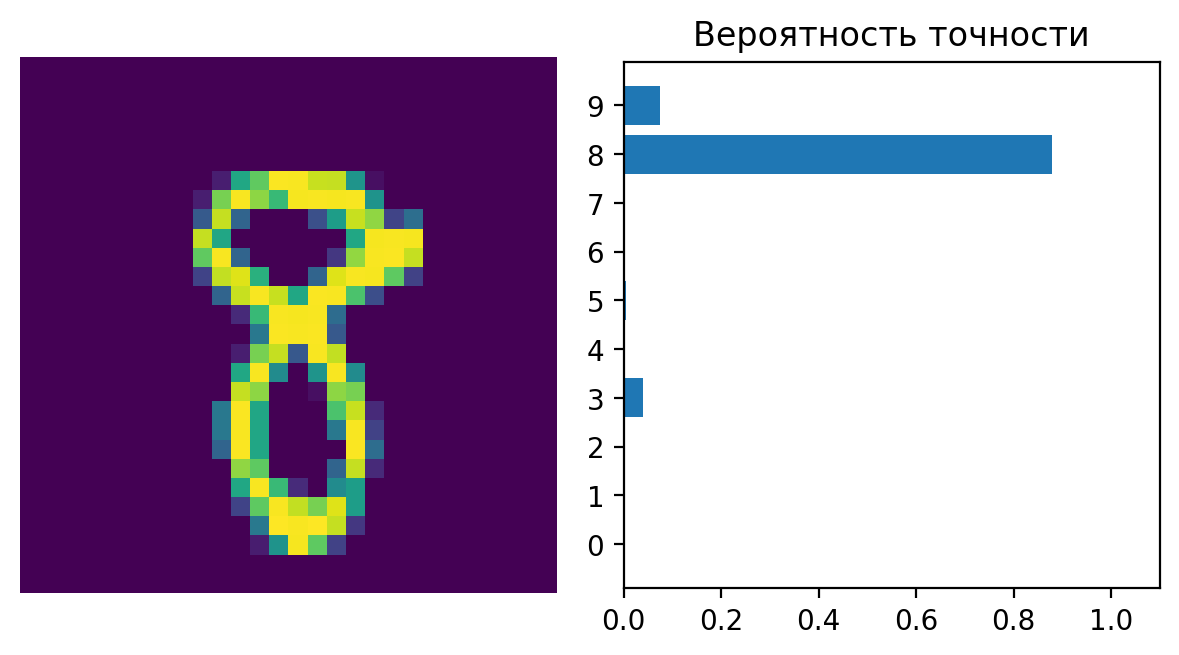

In [48]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Выключаем градиенты
with torch.no_grad():
    logps = model(img)

# Преобразуем вероятность ответа в линейное значение
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Предсказанная цифра =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Используем модель "

In [50]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Проверено циферок =", all_count)
print("\nТочность модели =", (correct_count/all_count))

Проверено циферок = 10000

Точность модели = 0.9214
